# Amharic Letter Classification

In [ ]:
"""
Sets up the foundation for a PyTorch image classification model.
Imports necessary libraries for dataset handling and model training.
"""

import os
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader

In [ ]:
"""
Defines a custom dataset class (MyDataset) for Amharic letter classification.

Parameters:
- folder_path: The path to the folder containing the dataset.
- transform: Optional image transformation to be applied.
"""

class MyDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_folder = ImageFolder(folder_path, transform=self.transform)

    def __len__(self):
        return len(self.image_folder)

    def __getitem__(self, idx):
        img, label = self.image_folder[idx]
        one_hot_label = torch.zeros(20)
        one_hot_label[label] = 1
        return img, one_hot_label

In [ ]:
# Specify the path to the dataset folder
dataset_path = '/content/drive/MyDrive/amharic_datasets'

In [ ]:
"""
Defines a sequence of image transformations using torchvision.transforms.Compose.

Transformations:
- Resize images to (28, 28) pixels.
- Convert images to PyTorch tensors.
"""

data_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

In [ ]:
# Create an instance of the custom dataset using the specified path and transformations
dataset = MyDataset(folder_path=dataset_path, transform=data_transform)

In [ ]:
dataset

In [ ]:
"""
Splits the dataset into training and testing sets using torch.utils.data.random_split.

Parameters:
- train_size: Percentage of data to be used for training (80%).
- test_size: Percentage of data to be used for testing (20%).
"""

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [ ]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

In [ ]:
# Prints the sizes of the training and testing datasets

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

Train dataset size: 3600
Test dataset size: 900


In [ ]:
# Create an iterator for the training DataLoader and retrieve the first batch
data_train = iter(train_loader)
images, labels = next(data_train)


In [ ]:
# Print the shapes of the images and labels in the batch
print("Batch of Images shape:", images.shape)
print("Batch of Labels shape:", labels.shape)

Batch of Images shape: torch.Size([20, 3, 28, 28])
Batch of Labels shape: torch.Size([20, 20])


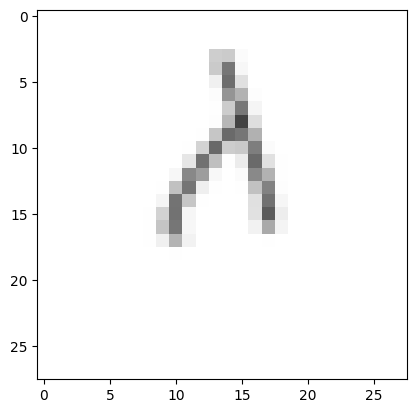

In [ ]:
# Displays the random letter(image) in the batch using matplotlib

plt.imshow(images[6].permute(1, 2, 0).numpy(), cmap='gray_r')

In [ ]:
# Defines a list of class labels corresponding to the dataset classes

classes = [
    'ሀ', 'ለ', 'መ', 'ረ', 'ሰ', 'ሸ', 'ቀ', 'በ', 'ተ', 'ቸ',
    'ነ', 'ከ', 'ዐ',  'ዘ', 'የ', 'ደ', 'ገ', 'ጠ', 'ፀ', 'ፐ'
]

In [ ]:
# Defines a function to plot a sample image with its corresponding class label

def plot_sample(index):
      plt.imshow(images[index].permute(1, 2, 0).numpy(), cmap='gray_r')
      # plt.xlabel(classes[np.argmax(labels[index])])

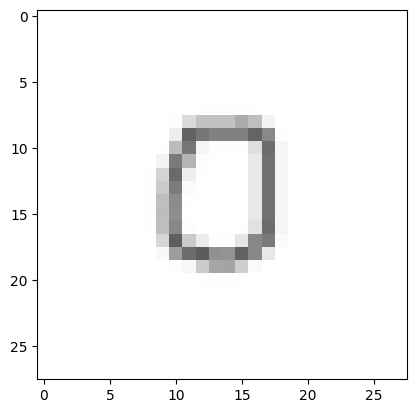

In [ ]:
# Plots a sample image with its corresponding class label for the specified index

plot_sample(1)

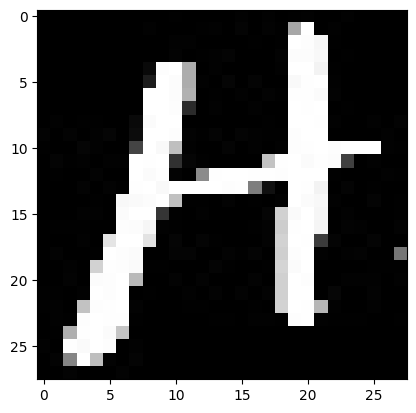

In [ ]:
plot_sample(14)

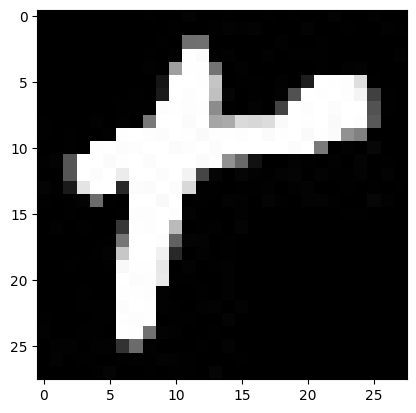

In [ ]:
plot_sample(9)

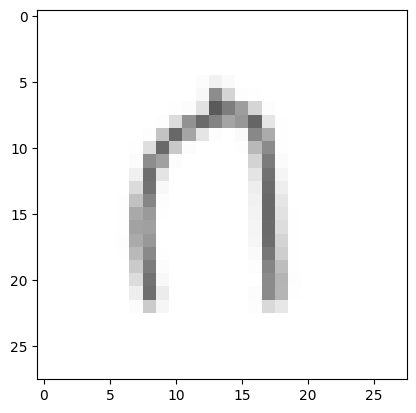

In [ ]:
plot_sample(18)

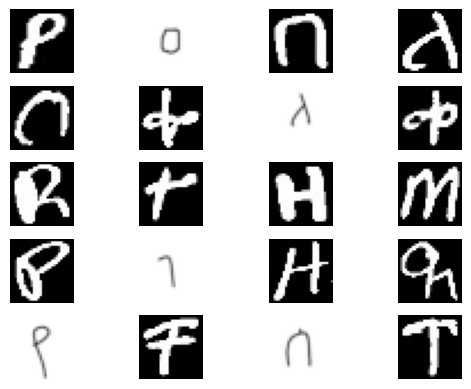

In [ ]:
# Plots a grid of sample images with no axis labels for the specified number of images (20)

num_of_images = 20
for index in range(num_of_images):
    plt.subplot(5, 4, index+1)
    plt.axis('off')
    plt.imshow(images[index].permute(1, 2, 0).numpy(), cmap='gray_r')

In [ ]:
# Iterates through the training dataset to get the first batch

for batch in train_dataset:
    x_train, y_train = batch
    break

In [ ]:
# Iterates through the testing dataset to get the first batch

for batch in test_dataset:
    x_test, y_test = batch
    break

In [ ]:
# Prints the shapes of the loaded training and testing datasets

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: torch.Size([3, 28, 28])
y_train shape: torch.Size([20])
x_test shape: torch.Size([3, 28, 28])
y_test shape: torch.Size([20])


In [ ]:
# Define our CNN model
# Describe convolutional layer
# This is just an example of how to build the model. I will build the actual model next.
conv1 = nn.Conv2d(3,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [ ]:
# 'x_train' contains the data from the first batch of the training dataset

x_train

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0392, 0.0000, 0.0118],
         ...,
         [0.0235, 0.0000, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0118, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0392, 0.0000, 0.0118],
         ...,
         [0.0235, 0.0000, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0118, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0078, 0.0000, 0.0078,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0039,  ..., 0.0392, 0.0000, 0.

In [ ]:
x = x_train.view(1,3,28,28)

In [ ]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [ ]:
# 1 single image, 6 is the filters, 26x26
x.shape # We didn't set padding so we lose 2 pixels around outside of the image

torch.Size([1, 6, 26, 26])

In [ ]:
# pass thru the pooling layer
x = F.max_pool2d(x,2,2)   # kernel of 2 and stride of 2

In [ ]:
x.shape  # 26 / 2 =13

torch.Size([1, 6, 13, 13])

In [ ]:
# Do our second convolutional layer
x = F.relu(conv2(x))

In [ ]:
x.shape # Again we didn't set padding so we lose 2 pixels around outside of the image


torch.Size([1, 16, 11, 11])

In [ ]:
# Pooling layer
x = F.max_pool2d(x,2,2)   # kernel of 2 and stride of 2

In [ ]:
x.shape    # 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up


torch.Size([1, 16, 5, 5])

In [ ]:
"""
Defines a concise convolutional neural network model (Model) for Amharic letter classification.
"""

# Model class
class Model(nn.Module):
    def __init__(self,num_classes = 20):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=3, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=3, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        # First pass
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        # Second pass
        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        # Review to flatten it out
        x = x.view(-1, 16*5*5) # -1 so that we can  vary the batch size

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return F.log_softmax(x,dim=1)


In [ ]:
"""
Sets a manual seed for reproducibility and instantiates the defined model (Model) with 20 classes.
Prints the architecture of the model.
"""

torch.manual_seed(97)

# Instantiate the model
model = Model(num_classes=20)

# Print the model architecture
print(model)


Model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=20, bias=True)
)


In [ ]:
"""
Defines the loss function (CrossEntropyLoss) and optimizer (Adam) for training the model.

Parameters:
- Loss function: CrossEntropyLoss.
- Optimizer: Adam with a learning rate of 0.01.
"""

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [119]:
import time
start_time = time.time()

# Training parameters
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Training loop
for epoch in range(epochs):
    trn_corr = 0
    tst_corr = 0
    train_total = 0
    model.train()  # Set the model to training mode

    # Train
    for batch, (X_train, y_train) in enumerate(train_loader):
        batch += 1

        optimizer.zero_grad() # Zero the gradients
        y_pred = model(X_train)  # Forward pass
        _, y_train = y_train.max(dim=1)
        loss = criterion(y_pred, y_train)  # Compute the loss

        predicted = torch.max(y_pred.data,1)[1]  # add up the number of correct predictions
        batch_corr = (predicted == y_train).sum()  # how many we got correct from this batch.
        trn_corr += batch_corr  # keep track as we go along in training.
        train_total += y_train.size(0)


        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights


        # Print statistics every 50 batches
        if not (batch % 50):
            print(f'Epoch {epoch + 1}, Batch {batch}, Loss: {loss.item():.4f}')

    train_accuracy = 100 * trn_corr / train_total

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Test
    model.eval() # Set the model to testing mode
    test_total = 0
    with torch.no_grad(): # no gradient so we don't update our weights and biases with test data
      for batch, (X_test,y_test) in enumerate(test_loader):
          y_val = model(X_test)
          predicted = torch.max(y_val.data,1)[1]  # Adding up correct predictions
          _, y_test = y_test.max(dim=1)
          test_total += y_test.size(0)
          tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

    test_accuracy = 100 * tst_corr / test_total

    print(f'Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.2f} % , Test Accuracy: {test_accuracy:.2f} %')


# Training complete
print('Finished Training')

current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes!")

Epoch 1, Batch 50, Loss: 2.8008
Epoch 1, Batch 100, Loss: 1.3168
Epoch 1, Batch 150, Loss: 1.5518
Epoch 1, Training Accuracy: 37.22 % , Test Accuracy: 65.22 %
Epoch 2, Batch 50, Loss: 1.5362
Epoch 2, Batch 100, Loss: 0.5758
Epoch 2, Batch 150, Loss: 0.6202
Epoch 2, Training Accuracy: 69.19 % , Test Accuracy: 69.56 %
Epoch 3, Batch 50, Loss: 0.1629
Epoch 3, Batch 100, Loss: 1.1156
Epoch 3, Batch 150, Loss: 0.8237
Epoch 3, Training Accuracy: 75.42 % , Test Accuracy: 80.67 %
Epoch 4, Batch 50, Loss: 0.5768
Epoch 4, Batch 100, Loss: 0.5894
Epoch 4, Batch 150, Loss: 0.5269
Epoch 4, Training Accuracy: 78.42 % , Test Accuracy: 78.89 %
Epoch 5, Batch 50, Loss: 0.9362
Epoch 5, Batch 100, Loss: 0.7826
Epoch 5, Batch 150, Loss: 0.6130
Epoch 5, Training Accuracy: 80.83 % , Test Accuracy: 78.78 %
Epoch 6, Batch 50, Loss: 0.7672
Epoch 6, Batch 100, Loss: 0.7554
Epoch 6, Batch 150, Loss: 0.6917
Epoch 6, Training Accuracy: 81.61 % , Test Accuracy: 81.33 %
Epoch 7, Batch 50, Loss: 0.7987
Epoch 7, Batch

In [121]:
"""
Tests the trained model on the test dataset and prints the accuracy.
"""

# Test
correct = 0
total = 0
model.eval()

with torch.no_grad(): # no gradient so we don't update our weights and biases with test data
  for X_test,y_test in test_loader:
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]  # Adding up correct predictions
      _, y_test = y_test.max(dim=1)
      total += y_test.size(0)
      correct += (predicted == y_test).sum()

accuracy = correct / total * 100

print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 81.00%


In [122]:
# Saves the model's state_dict to a file named 'amharic_letter_classification_model.pth'

torch.save(model.state_dict(), 'amharic_letter_classification_model.pth')

# Load the saved state_dict
model.load_state_dict(torch.load('/content/amharic_letter_classification_model.pth'))

# Now, 'model' is loaded with the parameters saved in 'amharic_letter_classification_model.pth'
# I can use 'model' for inference as you would with the original model.


<All keys matched successfully>

In [123]:
# Prints the lists of training and testing losses

print(train_losses)
print(test_losses)

[tensor(1.3335, grad_fn=<NllLossBackward0>), tensor(1.3098, grad_fn=<NllLossBackward0>), tensor(0.5260, grad_fn=<NllLossBackward0>), tensor(0.7631, grad_fn=<NllLossBackward0>), tensor(1.5034, grad_fn=<NllLossBackward0>), tensor(0.9136, grad_fn=<NllLossBackward0>), tensor(0.7599, grad_fn=<NllLossBackward0>), tensor(0.1863, grad_fn=<NllLossBackward0>), tensor(0.6889, grad_fn=<NllLossBackward0>), tensor(0.8494, grad_fn=<NllLossBackward0>)]
[tensor(1.1185), tensor(1.0162), tensor(0.6326), tensor(0.7099), tensor(0.8054), tensor(0.8312), tensor(0.7538), tensor(0.7062), tensor(0.5485), tensor(0.7136)]


In [124]:
# Converts the training losses from PyTorch tensors to Python floats

train_loss = [tl.item() for tl in train_losses]

In [125]:
# Prints the lists of training loss (converted to Python floats) and testing losses

print(train_loss)
print(test_losses)

[1.3335224390029907, 1.309844970703125, 0.5260339975357056, 0.7631380558013916, 1.5033974647521973, 0.9135690927505493, 0.7598578929901123, 0.18633101880550385, 0.6888524293899536, 0.8493749499320984]
[tensor(1.1185), tensor(1.0162), tensor(0.6326), tensor(0.7099), tensor(0.8054), tensor(0.8312), tensor(0.7538), tensor(0.7062), tensor(0.5485), tensor(0.7136)]


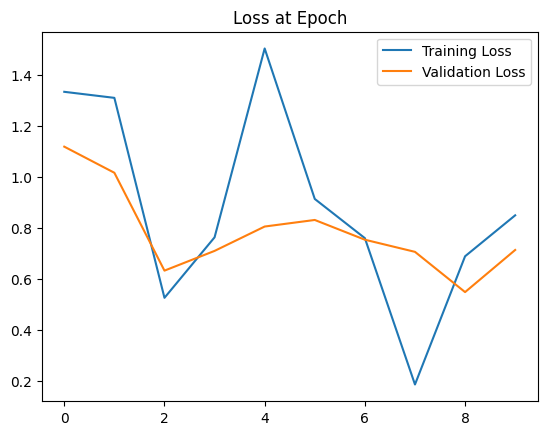

In [126]:
# Plots the training and validation losses over epochs

plt.plot(train_loss,label="Training Loss")
plt.plot(test_losses,label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

In [127]:
# Prints the number of correct predictions for training and testing sets

print(train_correct)
print(test_correct)

[tensor(1340), tensor(2491), tensor(2715), tensor(2823), tensor(2910), tensor(2938), tensor(3011), tensor(3075), tensor(3100), tensor(3109)]
[tensor(587), tensor(626), tensor(726), tensor(710), tensor(709), tensor(732), tensor(732), tensor(742), tensor(751), tensor(729)]


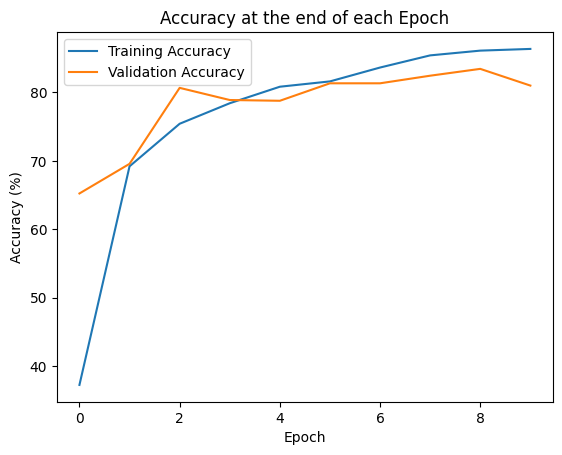

In [128]:
# Plots the training and validation accuracies at the end of each epoch

plt.plot([t/3600*100 for t in train_correct],label="Training Accuracy")
plt.plot([t/900*100 for t in test_correct],label="Validation Accuracy")
plt.title('Accuracy at the end of each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.legend()

In [129]:
# Creates a DataLoader for the entire test dataset with a batch size of 360(total test dataset) and no shuffling

test_load_everything = DataLoader(test_dataset,batch_size=360,shuffle=False)

In [130]:
# Tests the trained model on the entire test dataset without gradient computation

with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    _, y_test = y_test.max(dim=1)
    correct += (predicted == y_test).sum()

In [131]:
# Calculates the overall accuracy on the entire test dataset

accuracy_overall = correct.item() / len(test_dataset) * 100
print(f'Accuracy on the test set: {accuracy_overall:.2f}%')

Accuracy on the test set: 81.00%


In [132]:
# Grab an image

test_dataset[300]   # Tensor with an image in it...at end it shows the label

(tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0078],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
          ...,
          [0.0000, 0.0157, 0.0118,  ..., 0.4078, 0.0118, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0118, 0.0078],
          [0.0078, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0039]],
 
         [[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0078],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0039],
          ...,
          [0.0000, 0.0157, 0.0118,  ..., 0.4078, 0.0118, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0118, 0.0078],
          [0.0078, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0039]],
 
         [[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          [0.0000, 0.0078, 0.0000,  ..., 0.0000, 0.0000, 0.0078],
          [0.0000, 0.0078, 0.0000,  ...,

In [133]:
# Grab just the data

test_dataset[200][0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

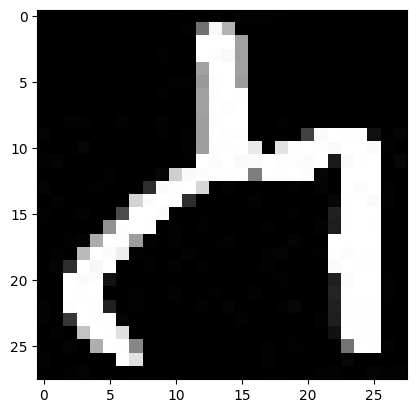

In [137]:
# Displays an image from the test dataset using matplotlib

plt.imshow(test_dataset[222][0].permute(1, 2, 0).numpy(), cmap='gray_r')

In [141]:
# Sets the model to evaluation mode and makes a prediction on a single image from the test dataset

model.eval()
with torch.no_grad():
  new_prediction = model(test_dataset[222][0].view(1,3,28,28))

In [142]:
# Retrieves the predicted class label based on the maximum probability

classes[new_prediction.argmax()]

'ሰ'

In [143]:
"""
Defines a concise function (Prediction) to make predictions on a specific image from the test dataset.
"""

def Prediction(test_dataset,ind):
    model.eval()
    with torch.no_grad():
        plt.imshow(test_dataset[ind][0].permute(1, 2, 0).numpy(), cmap='gray_r')
        new_prediction = model(test_dataset[ind][0].view(1, 3, 28, 28))
        predicted_class = classes[new_prediction.argmax()]
        print('Predicted:', predicted_class)

Predicted: የ


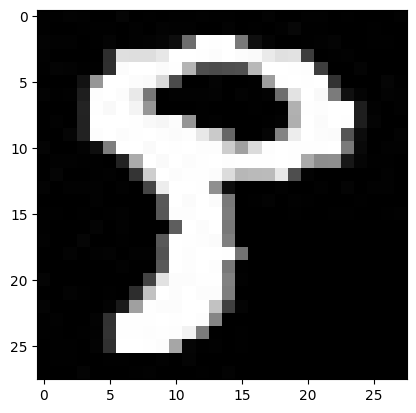

In [144]:
# Calls the Prediction function on the test dataset with image index 10

Prediction(test_dataset,10)

Predicted: ፀ


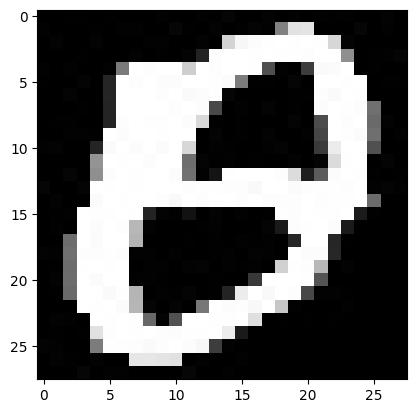

In [147]:
Prediction(test_dataset,105)

Predicted: ሸ


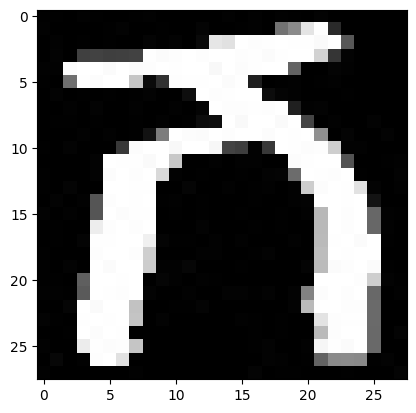

In [148]:
Prediction(test_dataset,60)

Predicted: ሀ


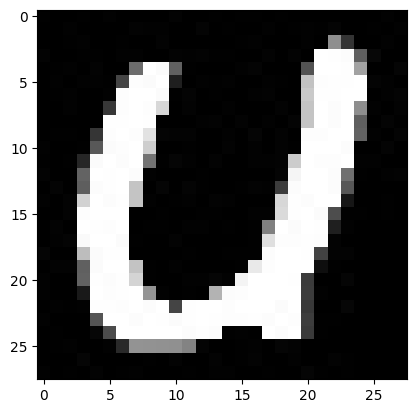

In [151]:
Prediction(test_dataset,144)

In [152]:
# Sets the model to evaluation mode and predicts classes for all samples in the test dataset

model.eval()  # Set the model to evaluation mode
y_pred_list = []

with torch.no_grad():
    for i in range(len(test_dataset)):
        X_test, y_test = test_dataset[i]
        X_test = X_test.view(1, 3, 28, 28)  #
        y_val = model(X_test)
        _, y_pred = torch.max(y_val, 1)
        y_pred_list.append(y_pred.item())

y_classes = y_pred_list

In [153]:
# Prints the predicted classes for the first 20 samples in the test dataset

y_classes[:20]

[4, 12, 1, 10, 8, 11, 8, 1, 16, 0, 14, 12, 4, 6, 5, 2, 3, 2, 18, 18]

# **Thank you!**

### **Muluken Hakim Ayansa**

